# Capstone Webscrapping using BeautifulSoup


In analyzing a problem, data can be taken from various sources. One source that can be used is through websites of trusted institutions. Data through the site can be retrieved through the Web Scrapping process. Web scraping is the process of taking data or extracting from a website and storing it in a specific format. The following is the data retrieval process on the website www.exchange-rates.org to obtain data on the Rupiah exchange rate against the US Dollar at some time.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [14]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [15]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema" />\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\n<meta name="mapping" content="A" />\n<base href="https://www.exchange-rates.org/" />\n'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [16]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [17]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     3/5/2021
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/3-5-2021">
      14,292.17893
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/3-5-2021">
      USD IDR rate for 3/5/2021
     </a>
    </td>
   </tr>
   <tr>
    <td>
     3/4/2021
    </td>
    <td>
 


Do the scrapping process here (please change this markdown with your explanation)

In [18]:
tr = table.find_all('tr')
tr[:2]

[<tr><td>3/5/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/3-5-2021">14,292.17893</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-5-2021">USD IDR rate for 3/5/2021</a></td></tr>,
 <tr><td>3/4/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/3-4-2021">14,261.85426</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/3-4-2021">USD IDR rate for 3/4/2021</a></td></tr>]

After getting the required variables, data looping is needed to retrieve all the data in the page. The data to be taken is data for a week (7 days)

In [66]:
temp = [] #initiating a tuple


for i in range(3,10):
    row = table.find_all('tr')[i]
    
    #get date
    date = row.find_all('td')[0].text
    date = date.strip() #for removing the excess whitespace
    
    #get day
    day = row.find_all('td')[1].text
    day = day.strip() #for removing the excess whitespace
    
    #get rate
    rate = row.find_all('td')[2].text
    rate = rate.strip() #for removing the excess whitespace

    temp.append((date,day,rate)) 
    
temp

AttributeError: module 'pandas' has no attribute 'Datetimeindex'

In [67]:
temp = temp[::-1]
temp

[('3/2/2021', 'Tuesday', '14,256.28041 IDR'),
 ('3/1/2021', 'Monday', '14,248.60576 IDR'),
 ('2/26/2021', 'Friday', '14,300.27815 IDR'),
 ('2/25/2021', 'Thursday', '14,139.73096 IDR'),
 ('2/24/2021', 'Wednesday', '14,083.03673 IDR'),
 ('2/23/2021', 'Tuesday', '14,092.64503 IDR'),
 ('2/22/2021', 'Monday', '14,118.07274 IDR')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [68]:
import pandas as pd

exchange = pd.DataFrame(temp,columns = ('date','day', 'rate'))
exchange

,date,day,rate
0,3/2/2021,Tuesday,"14,256.28041 IDR"
1,3/1/2021,Monday,"14,248.60576 IDR"
2,2/26/2021,Friday,"14,300.27815 IDR"
3,2/25/2021,Thursday,"14,139.73096 IDR"
4,2/24/2021,Wednesday,"14,083.03673 IDR"
5,2/23/2021,Tuesday,"14,092.64503 IDR"
6,2/22/2021,Monday,"14,118.07274 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [69]:
exchange['rate']=exchange['rate'].str.replace('IDR','')
exchange

,date,day,rate
0,3/2/2021,Tuesday,"14,256.28041"
1,3/1/2021,Monday,"14,248.60576"
2,2/26/2021,Friday,"14,300.27815"
3,2/25/2021,Thursday,"14,139.73096"
4,2/24/2021,Wednesday,"14,083.03673"
5,2/23/2021,Tuesday,"14,092.64503"
6,2/22/2021,Monday,"14,118.07274"


We need to change the appropriate data type

In [70]:
exchange['rate'] = exchange['rate'].str.replace(',','')
exchange['rate'] = exchange['rate'].astype('float64')

exchange.dtypes

date     object
day      object
rate    float64
dtype: object

In [72]:
exchange.index=exchange['date']
exchange.index=pd.DatetimeIndex(exchange.index)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

In [75]:
exchange.describe().round(2)

,rate
count,7.00
mean,14176.95
std,88.90
min,14083.04
25%,14105.36
50%,14139.73
75%,14252.44
max,14300.28


<AxesSubplot:title={'center':'Exchange Rates IDR to USD'}, xlabel='Date', ylabel='Rate (in Rp)'>

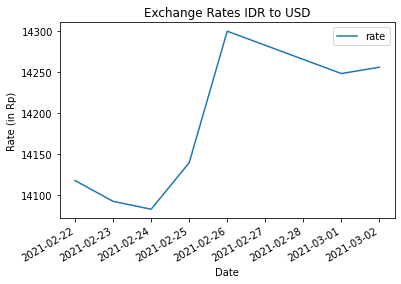

In [76]:
exchange[['date','rate']].plot(
    xlabel = "Date",
    ylabel = "Rate (in Rp)",
    title = "Exchange Rates IDR to USD")

Based on data on the rupiah exchange rate against the US Dollar for a week (7 days), it can be seen that the Rupiah has weakened against the US Dollar. Even though in the middle of the week there was a strengthening of the Rupiah. The rupiah is at an average of 14,149 with the highest value of 14,300 and the lowest at 14,100.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.